# Rankine cycle

## Analyzing an ideal Rankine Cycle

<img src='./assets/images/5_Rankine_ideal.png' />

---
### Importing packages

In [1]:
import cantera as ct

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
from functions import plot_T_s


### Problem statement and hypotesis

Steam is the working fluid in an ideal Rankine cycle. Saturated
vapor enters the turbine at 8.0 MPa and saturated liquid exits the
condenser at a pressure of 0.008 MPa. The net power output of
the cycle is 100 MW. 

**Engineering Model**
1.  Each component of the cycle is analyzed as a control volume at steady state. The control volumes are shown on the accompanying sketch by dashed lines.
1. All processes of the working fluid are internally reversible.
1. The turbine and pump operate adiabatically.
1. Kinetic and potential energy effects are negligible.
1. Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

**Determine for the cycle** 

1. the thermal efficiency,
1. the back work ratio, 
1. the mass flow rate of the steam, in kg/h, 
1. the rate of heat transfer, $\dot{Q}_{in}$ , into the working fluid as it passes through the boiler, in MW, 
1. the rate of heat transfer, $\dot{Q}_{out}$, from the condensing steam as it passes through the condenser, in MW, 
1. the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits at 35°C.


In [2]:
W_cycle = 100
p1 = 8e6
p2 = p3 = 8e3

# create an object representing water
w = ct.Water()

# reference state (triple point; liquid state)
w.TQ = w.min_temp, 0
uf0 = w.int_energy_mass / 1.0e3
hf0 = w.enthalpy_mass / 1.0e3
sf0 = w.entropy_mass / 1.0e3
pv0 = w.P * w.v / 1.0e3

w.PQ = p1, 0
T0 = w.T
s0 = w.s
h0 = w.h

w.PQ = p1, 1
T1 = w.T
s1 = w.s
h1 = w.h


# to compare with steam tables change referance state
def print_s(s):
    print(round(s / 1e3 - sf0, 2), "kJ/kg K")


def print_h(h):
    print(round(h / 1e3 - hf0 - pv0, 2), "kJ/kg")


print_s(s1)
print_h(h1)

5.74 kJ/kg K
2758.13 kJ/kg


**State 2** is fixed by p2 = 0.008 MPa and the fact that the specific entropy is constant for the adiabatic, internally reversible expansion through the turbine.

$$x_2 = \frac{s_2-s_f}{s_g-s_f}$$

In [3]:
s2 = s1

# sf
w.PQ = p2, 0
T2 = w.T
sf = w.s

# sg
w.PQ = p2, 1
sg = w.s

x2 = (s2 - sf) / (sg - sf)

print(x2)

w.PQ = p2, x2
h2 = w.h

print_h(h2)

0.6745017265808799
1794.87 kJ/kg


**State 3** is saturated liquid at 0.008 MPa, so:

In [4]:
w.PQ = p3, 0

T3 = w.T
h3 = w.h
s3 = w.s

print_h(h3)

174.03 kJ/kg


**State 4** is fixed by the boiler pressure $p_4$ and the specific entropy $s_4$ = $s_3$.

In [5]:
w.SP = s3, p1
h4 = w.h
s4 = w.s
T4 = w.T

print_h(h4)

182.08 kJ/kg


Let's start answeing the questions:

1. Thermal efficiency

The _net_ power developed by the cycle is
   $$ \dot{W}_{cycle} = \dot{W}_t - \dot{W}_p $$

Mass and energy rate balances for control volumes around the turbine and pump give, respectively,

$ \frac{\dot{W}_t}{\dot{m}} = h_1 - h_2 $ and $ \frac{\dot{W}_p}{\dot{m}} = h_4 - h_3 $

where $\dot{m}$ is the mass flow rate of the steam.

The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$$ \frac{\dot{Q}_{in}}{\dot{m}} = h_1 - h_4 $$

The thermal efficiency is then

$$ \eta = \frac{\dot{W}_t - \dot{W}_p}{\dot{Q}_{in}} = \frac{(h_1-h_2) - (h_4-h_3)}{h_1 - h_4} $$

In [6]:
eta = (h1 - h2 - h4 + h3) / (h1 - h4)

print(f"{round(eta * 100, 1)} %")

37.1 %


2) Back work ratio

$$ bwr = \frac{\dot{W}_p}{\dot{W}_t} = \frac{h_4-h_3}{h_1-h_2} $$

In [7]:
bwr = (h4 - h3) / (h1 - h2)
print(f"{round(bwr * 100, 2)} %")

0.84 %


3) Mass flow rate

Can be obtained from the expression for the net power given in part 1). 
Thus,

$$ \dot{m} = \frac{\dot{W}_{cycle}}{(h_1-h_2)-(h_4-h_3)} $$

In [8]:
m = (W_cycle * 1e6) / (h1 - h2 - h4 + h3)  # kg/s
print(f"{round(m * 3600, 2)} kg/h")

376881.08 kg/h


4) Rate of heat transfer, $\dot{Q}_{in}$ , into the working fluid as it passes through the boiler, in MW.

With the expression for $\dot{Q}_{in}$ in from part 1) and previously determined specific enthalpy values

$$\dot{Q}_{in} = \dot{m} \cdot (h_1-h_4)$$

In [9]:
Q_in = m * (h1 - h4)

print(f"{round(Q_in / 1e6, 2)} MW")

269.68 MW


5) Rate of heat transfer, $\dot{Q}_{out}$, from the condensing steam as it passes through the condenser, in MW.

Mass and energy rate balances applied to a control volume enclosing the steam side of the condenser give

$$\dot{Q}_{out} = \dot{m} \cdot (h_2-h_3)$$


In [10]:
Q_out = m * (h2 - h3)

print(f"{round(Q_out / 1e6, 2)} MW")

169.68 MW


6) Mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits at 35°C.

Taking a control volume around the condenser, the mass and energy rate balances give at steady state

$$ 0= \dot{Q}_{cv} - \dot{W}_{cv} + \dot{m}_{cw} \cdot (h_{cw, in} - h_{cw, out}) + \dot{m} \cdot (h_2 - h_3) $$

with $\dot{Q}_{cv}$ and $\dot{W}_{cv}$ being 0.

Thus,



In [11]:
w.TQ = 15 + 273.15, 0
h_cw_in = w.h

w.TQ = 35 + 273.15, 0
h_cw_out = w.h

m_cw = m * (h2 - h3) / (h_cw_out - h_cw_in)

print(f"{round(m_cw * 3600, 2)} kg/h")

7300189.13 kg/h


Let's visualize the plot

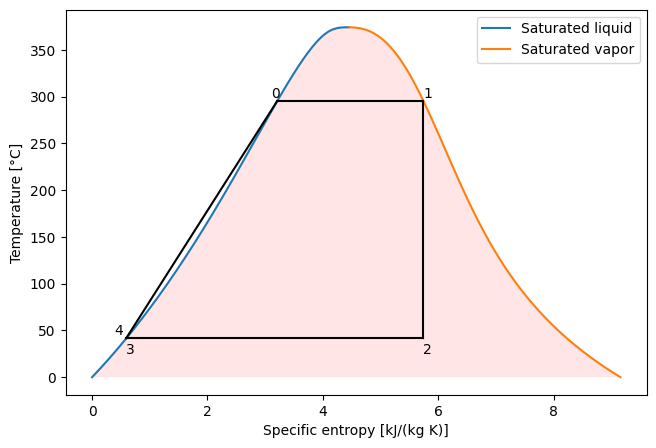

In [12]:
fig, ax = plot_T_s(w)

# 1-2
ax.annotate("1", (s1 / 1e3 - sf0, T1 - 270))
ax.annotate("2", (s2 / 1e3 - sf0, T2 - 290))
ax.plot([s1 / 1e3 - sf0, s2 / 1e3 - sf0], [T1 - 273.15, T2 - 273.15], "k")

# 2-3
ax.annotate("3", (s3 / 1e3 - sf0, T3 - 290))
ax.plot([s2 / 1e3 - sf0, s3 / 1e3 - sf0], [T2 - 273.15, T3 - 273.15], "k")

# 3-4
ax.annotate("4", (s4 / 1e3 - sf0 - 0.2, T4 - 270))
ax.plot([s3 / 1e3 - sf0, s4 / 1e3 - sf0], [T3 - 273.15, T4 - 273.15], "k")

# 4-0
ax.annotate("0", (s0 / 1e3 - sf0 - 0.1, T0 - 270))
ax.plot([s4 / 1e3 - sf0, s0 / 1e3 - sf0], [T4 - 273.15, T0 - 273.15], "k")

# 0-1
ax.plot([s0 / 1e3 - sf0, s1 / 1e3 - sf0], [T0 - 273.15, T1 - 273.15], "k")